In [41]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


In [27]:
model = load_model('4096_train_last_block.h5')

In [42]:
print(keras.__version__)
print (tf.keras.__version__)

2.2.4
2.2.4-tf


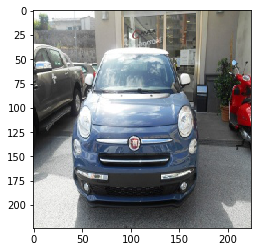

prediction: anteriore


In [29]:

labels = {0: 'altro', 1: 'anteriore', 2: 'anteriore_dx', 3: 'anteriore_sx', 4: 'bagaglio', 5: 'cruscotto', 6: 'lato_dx', 7: 'lato_sx', 8: 'moto', 9: 'motore', 10: 'posteriore', 11: 'posteriore_dx', 12: 'posteriore_sx', 13: 'ruote', 14: 'sedili', 15: 'strumenti'}


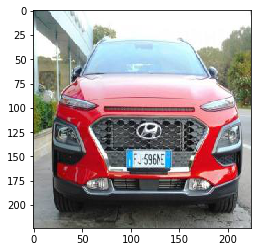

Prediction: 1.0/anteriore


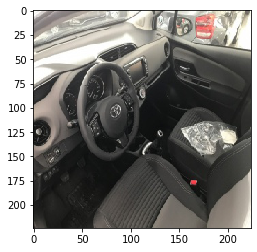

Prediction: 1.0/cruscotto


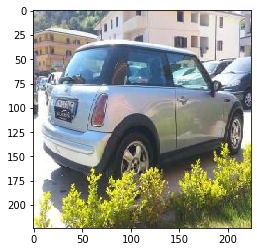

Prediction: 1.0/posteriore_dx


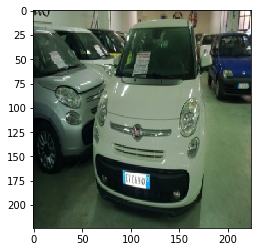

Prediction: 1.0/anteriore


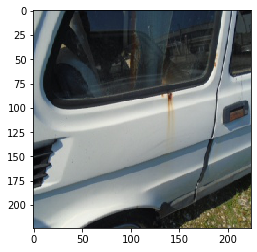

Prediction: 1.0/posteriore_dx


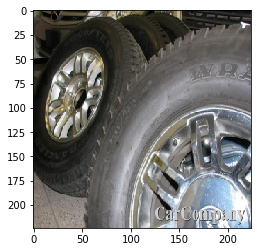

Prediction: 1.0/cruscotto


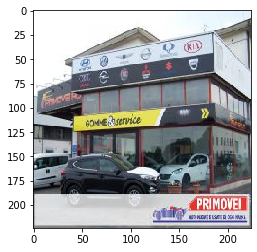

Prediction: 0.834340512752533/strumenti


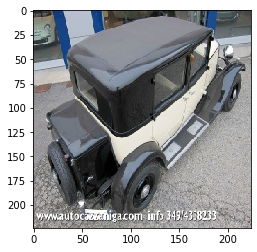

Prediction: 1.0/posteriore_dx


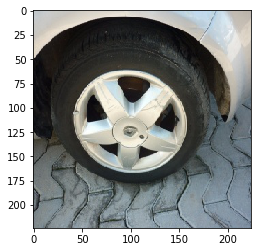

Prediction: 1.0/ruote


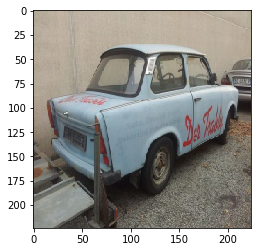

Prediction: 1.0/posteriore_dx


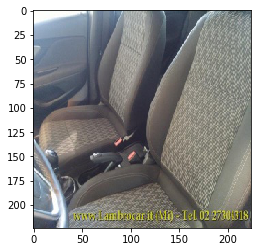

Prediction: 1.0/sedili


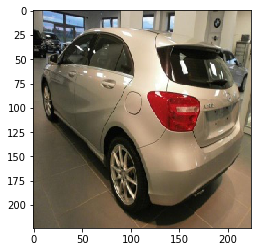

Prediction: 1.0/posteriore_sx


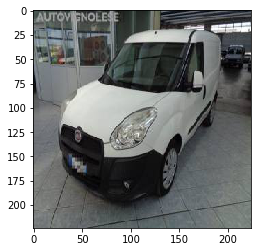

Prediction: 1.0/anteriore_sx


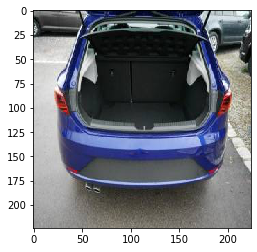

Prediction: 1.0/posteriore


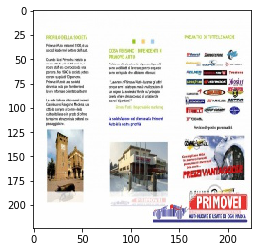

Prediction: 1.0/posteriore_sx


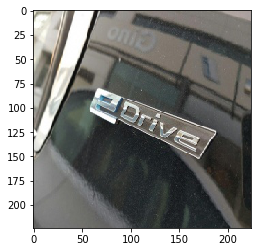

Prediction: 1.0/strumenti


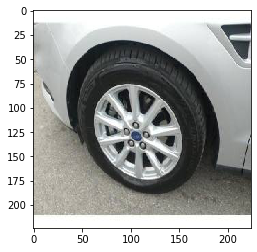

Prediction: 1.0/ruote


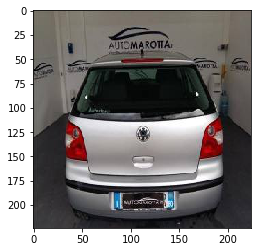

Prediction: 1.0/posteriore


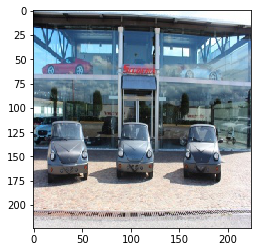

Prediction: 1.0/anteriore


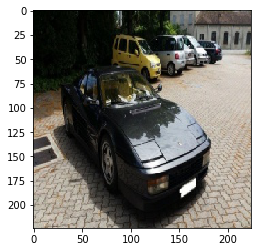

Prediction: 1.0/anteriore_dx


In [46]:
from pathlib import Path
from keras.applications.vgg16 import decode_predictions

def make_prediction(item, model, labels):
    img = image.load_img('{0}'.format(item), target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_list = np.expand_dims(img_array, axis=0)
    plt.imshow(img)
    plt.show()
    out = model.predict(img_list)
    predicted_class=np.argmax(out)
   
    confidence = out[0][predicted_class]
    print ("Prediction: {0}/{1}".format(confidence, labels[predicted_class]))
    return labels[predicted_class]

src = Path('data/tmp_img')
i = 0
for item in src.iterdir():
    if item.is_file():
        prediction = make_prediction(item, model, labels)
        #print(prediction)
        filename = os.path.basename(item)
        #os.rename(item, 'data/predictions/{0}/{1}'.format(prediction, filename))
    i = i + 1
    if i == 20:
        break
